In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

from generic_data import GenericDataset
from SimpleNNs import OneNet, TwoNet

In [2]:
# Seeds that perform better on...
# f1: 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13
# f2: 3

# Post double shift experiment
# f1: 0, 1, 3
# f2: 2

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
def target(x):
    shift = np.pi / 8.0 # np.pi / 4.0
    #f1 = (np.sin(8 * x) / (4 * np.cos(2 * x))).reshape(-1,1)
    f1 = (np.sin(8 * (x+ 2*shift)) / (4 * np.cos(2 * (x+ 2*shift)))).reshape(-1,1)
    f2 = (np.sin(8 * (x+shift)) / (4 * np.cos(2 * (x+shift)))).reshape(-1,1)
    return np.hstack((f1,f2))

In [4]:
#np.random.permutation(np.arange(1000))

In [5]:
# permutation = np.array([118,  88,  39,  61, 207,  46,  14,  29, 295,  79,  40,  92,  48,
#        124,  41,  18, 200,  20, 263,  89, 165, 249, 219, 175, 181,  36,
#         72, 239,  93, 266, 222, 234, 147,  30, 109, 106,  43, 111, 245,
#         51, 100, 211, 101, 136,  28, 243, 259, 264, 153, 112,  17, 173,
#         56,  35, 230, 250, 233, 115, 171, 214,  34, 257, 174, 131, 168,
#        110,  76, 148,  80, 151, 108, 256,  78,  50, 253, 193, 180, 192,
#         87,  26, 238, 205, 145, 260, 167,  66, 204, 297, 218, 272, 199,
#        188,  45, 252,  37, 231, 176, 212,   6,  23,   2, 202, 265, 149,
#         25, 236,  64, 294, 292, 248, 201,   7, 235, 226, 189, 132,  67,
#        274,  53, 157, 283,  32,  85, 246, 227, 126, 121, 154, 254, 271,
#          1, 185,   4, 198, 240, 152, 210,  33, 208, 282, 170, 116,  31,
#          0, 139, 183,  58, 133,  74,  19, 130, 284, 105,  62, 286,  27,
#         16,  22,  49, 196, 242, 280,  81, 177, 163, 125, 184, 142, 216,
#         63, 223, 123,  94,  42,  75, 117, 273, 160, 275,  77, 107,  99,
#         60, 278, 144,  55,   5, 213,  70, 159, 261,   9, 220,  65, 155,
#        187,  12, 141, 169,   8, 162, 270,  84, 120, 232, 158, 237, 262,
#        114, 229, 255, 228,  59,  98, 268, 224,  52, 182,  90, 267, 146,
#        104, 247, 143,  86, 122, 191, 217, 128, 287, 244, 102, 277, 197,
#         83,  91,  69,  57, 298, 156, 113, 164, 296, 178, 241, 179, 215,
#         95, 172, 291, 140, 194, 206, 276, 103, 288, 135, 166,  38, 127,
#        285,  21, 150, 293, 209, 186, 251, 195, 129,  54, 258, 119,  11,
#        281, 138, 225, 190,  13,  71,  96, 221,  82,  24,  47,  10, 203,
#        137, 290, 279,   3, 161, 134,  15,  68,  73,  44, 289, 269, 299,
#         97])

# 300 

In [6]:
permutation = np.array([ 37, 726, 846, 295, 924, 658, 682, 286, 880, 272, 137, 954, 515,
       788, 860, 640, 737, 683, 412,  71, 213,  67, 231, 856, 197, 639,
       376, 192,  99, 678, 650, 223, 205, 748, 462, 146,  20, 897, 546,
       646, 687, 935, 821, 553, 589, 370, 596, 886, 794, 913,  15, 757,
       444, 330, 871, 984, 543, 525, 164, 863, 182, 927, 101, 578, 185,
        68, 615, 549, 338, 322, 279, 288, 251, 908, 236, 508, 716, 931,
       230, 621, 727, 232, 832, 409, 797, 143, 906, 599, 199,  65, 179,
       280, 830, 742, 463, 158, 715, 881, 824, 518, 653, 258, 951, 396,
       557, 834, 432, 426, 522, 504, 732, 698,   7, 912, 580, 193, 691,
       556, 685, 840, 411, 465, 974, 664, 267, 212, 887, 423, 293, 827,
       815, 812, 612, 869, 652,  89, 141, 418, 310, 733, 481, 239,  70,
       375, 312, 398, 455, 363, 828, 848, 614, 929, 397, 445, 414, 379,
       291,  74, 226, 486, 333,  84, 480, 694, 284, 209, 142, 250, 925,
       355, 576, 388, 535, 829, 464,   1, 183, 109, 160, 937, 811, 431,
       391, 901, 172, 128, 802, 798, 779, 169, 484, 451, 577,  77, 575,
       839, 810, 930, 616, 809, 175, 818, 677, 952, 200, 532, 311, 552,
       526, 895, 399, 705, 309, 152, 833, 273, 819, 878, 374,  91, 957,
       452, 933, 365, 973, 318,  62,  18, 976, 982, 749, 744, 347, 617,
       675,  22, 660, 706, 510, 188, 235, 419, 739, 699, 542, 944, 315,
       227, 241, 490, 673, 107, 898, 441, 439, 717, 436, 343, 473,  80,
       696, 979, 946,  30,  10, 890, 524, 795, 157, 346, 752, 257, 317,
       496,   4, 710, 198, 116, 204, 692, 174, 701, 202, 756, 920, 119,
       177, 275, 862,  13, 248, 909, 345, 941, 384, 894, 540, 567, 641,
       129,  90, 305, 126, 963, 163, 111, 702, 859, 868, 453, 719, 728,
       327, 502,  72,   2, 573, 825, 620,  12, 803, 883, 688, 427, 108,
       740, 969, 181, 923, 948, 335, 308, 753, 304, 781, 530,  42, 356,
       633, 791, 437, 771, 471, 294, 600, 867, 558, 854, 593, 777, 438,
       340,  55, 786, 874, 344, 216, 460,  40, 642, 989, 899, 711, 178,
       176, 492,  58, 457, 476,  16, 458, 700, 440, 686, 889, 459, 822,
       877, 637, 659, 519, 417,  29, 955, 400, 669, 783, 429, 488, 203,
       371,  32, 513, 996, 967, 156, 572, 826, 334, 382, 529, 372, 891,
       579, 601,   3, 663, 747, 130, 626, 624, 342, 835,  41, 321, 222,
       328, 916, 511, 113,  48, 289,  76, 206, 978, 447, 285, 936, 386,
       225, 707, 120, 990, 512, 456, 387, 595, 221, 268, 171, 773, 768,
       684, 544, 884, 864, 765, 123, 915, 180, 161, 704, 265, 734, 117,
       844, 962, 763, 521, 672, 998, 468, 597, 240, 134, 155, 353, 139,
       932, 965,  60, 352, 643, 165, 960, 879, 300, 214, 407, 882, 297,
       394, 131, 314, 911, 738, 731, 416, 565,  38, 470, 249, 505, 402,
        53, 194, 136, 581, 662, 671, 281,  35, 968, 813, 743, 378, 644,
        66, 571, 681, 536,  52, 377, 712, 851, 959, 246, 940, 425, 666,
        28, 907, 244, 103, 276, 393, 110, 159, 112, 568, 551, 329, 262,
       858, 654, 167, 905, 154, 949,  24, 857, 443, 150,  94, 217, 381,
        23, 292, 173, 100,  25, 755, 636, 489, 865, 354, 645, 242, 999,
        73, 559, 964, 118, 114, 520,   5, 475, 656, 986,  69,  14, 991,
       618, 369,  78, 479, 724,  54, 467, 266, 787, 514, 537, 872, 503,
       606, 166, 690, 331, 876, 247, 373, 632, 472, 499, 638, 608, 563,
       977, 307, 793, 799, 566, 501, 234, 775, 430, 629, 191, 151, 435,
       256, 910, 667, 778, 541, 569, 582, 383, 145, 850, 928, 533, 215,
       842, 900, 665, 196, 843, 495, 591,  17, 776,  27, 277, 631, 395,
       228, 320, 147, 721, 950, 494, 598, 449, 713, 106, 350, 523, 389,
       448,  93, 259, 554, 888, 170, 254, 602, 252, 306, 547, 796, 953,
       428, 186, 269, 630, 162, 413, 774, 789,  98,   6, 801, 852, 611,
       229, 264, 368, 695, 861, 845, 896, 403, 947, 610, 189, 332, 303,
       260, 144, 627, 283, 853,  11, 814, 594, 693, 531, 469, 127, 735,
        57,  33, 237, 921, 282, 586, 362, 243, 603,  92, 210, 337, 729,
       668, 301,  85, 190,  39, 500, 623, 507, 634, 516, 723, 104, 806,
       233, 676, 105, 341, 926, 253, 408, 422, 208, 980, 770,  82, 497,
       919, 583, 780,  87,  64, 270, 605, 274, 985, 870, 792, 893, 153,
       613, 782, 410, 866, 517,  44, 625, 390, 220, 140, 349, 357, 722,
       133, 261, 278,  79, 975, 115, 816, 836, 718, 380, 934, 184, 790,
       358,  36, 339, 837, 754, 420, 149,   9,  45,  95, 902, 995, 548,
       560, 298, 290, 415, 313, 421, 657, 122, 841, 817, 361, 336, 135,
       849, 709, 769, 651, 367, 961, 914, 619,   8,  97, 970, 348, 509,
       956, 703, 746,  21, 482, 966, 405, 784, 917, 987, 847, 478, 590,
       491,  46, 364, 296,  49, 487, 224, 750, 219, 945, 761, 988, 647,
       201, 562, 622, 992,  63, 804, 604, 245, 442, 971, 574,   0, 539,
       767, 762, 689, 187, 406, 148, 751, 983, 943,  26, 461, 670, 655,
       785,  59, 714, 326, 424, 720, 477,  43, 661, 635, 823, 528, 736,
       483, 218, 741, 820, 994, 855, 922, 609, 485, 125, 903,  61,  81,
       680, 324, 385, 993,  56,  19, 958,  86, 838, 758, 649, 316,  34,
       808, 138, 766, 588, 904, 498, 538, 800, 555,  96,  83, 446, 474,
       764, 366, 873, 697, 585, 885, 972, 760, 918, 401, 759, 392, 939,
       745, 271, 506, 997, 434, 648, 942, 807, 561, 207, 319, 981, 132,
        50, 238, 564, 592, 450,  31, 121, 211, 351, 454, 302, 708,  88,
       325, 323, 255, 892, 570, 545, 550, 359,  51, 875, 938, 772, 102,
       195, 679, 805, 628, 124, 404, 730, 287, 831,  47, 725, 587, 607,
       433, 674, 263, 360,  75, 466, 299, 534, 584, 493, 527, 168])

In [7]:
# define range
low = -2
high = 2

In [8]:
# Generates training dataset
Xtrain = np.linspace(low, high, 1000)[permutation] #np.random.uniform(low, high, 300)
Ytrain = target(Xtrain)

In [9]:
# generate test set
Xtest = np.linspace(low, high, 100) #np.sort(np.random.uniform(low, high, 100))
Ytest = target(Xtest)

In [10]:
# plt.scatter(Xtrain, Ytrain[:,0], s=10)
# plt.scatter(Xtrain, Ytrain[:,1], s=10)
# plt.title("Training Dataset")
# plt.show()

In [11]:
# plt.scatter(Xtest, Ytest[:,0], s=10)
# plt.scatter(Xtest, Ytest[:,1], s=10)
# plt.title("Testing Dataset")
# plt.show()

In [12]:
train_dataset = GenericDataset(Xtrain.reshape(-1,1), Ytrain)
test_dataset = GenericDataset(Xtest.reshape(-1,1), Ytest)

In [13]:
# Define model parameters
input_size = 1
output_size = 2
hidden_size = 20
shuffle=False

# Define training parameters
epochs = 200
milestones = [80]
lr = 0.01
momentum = 0.9
batch_size = 64
decreaselr = False

# Device parameters
device = "cuda"

In [14]:
# Declare TwoNet
model=TwoNet(input_size, output_size, hidden_size)

In [15]:
# Train TwoNet
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=shuffle)

In [16]:
LOSS=[]

model = model.double()
model.to(device)

for epoch in range(epochs):
    if decreaselr and (epoch in milestones):
            lr = lr*0.1
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    
    cnt = 0
    loss_sum = 0.0
    
    for x,y in train_loader:
        cnt += 1
        x = x.to(device)
        y = y.to(device)
            
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        loss_sum += loss.item()
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    
    loss_avg = loss_sum / cnt
    LOSS.append(loss_avg)

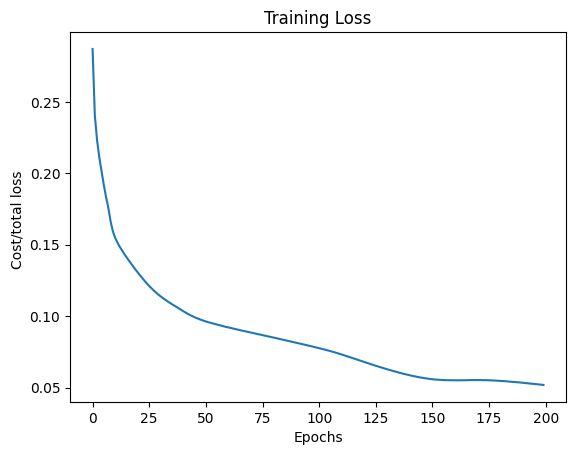

In [17]:
plt.plot(LOSS)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Cost/total loss ")
plt.show()

In [18]:
model.eval()
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=shuffle)

preds = []
labels = []
    
for batch_vec, batch_labels in iter(test_loader):
    batch_vec = batch_vec.to(device)
    
    batch_outputs = model(batch_vec)
    batch_preds = batch_outputs.cpu().detach().numpy()
    batch_labels = batch_labels.numpy()
    preds.append(batch_preds)
    labels.append(batch_labels)

preds = np.concatenate(preds)
labels = np.concatenate(labels)

In [19]:
# Compute regression error
regression_mse_f1 = np.square(np.subtract(preds[:,0], labels[:,0])).mean()
regression_mse_f2 = np.square(np.subtract(preds[:,1], labels[:,1])).mean()

regression_mse_f1, regression_mse_f2

(0.05836336611915237, 0.050631711447928524)

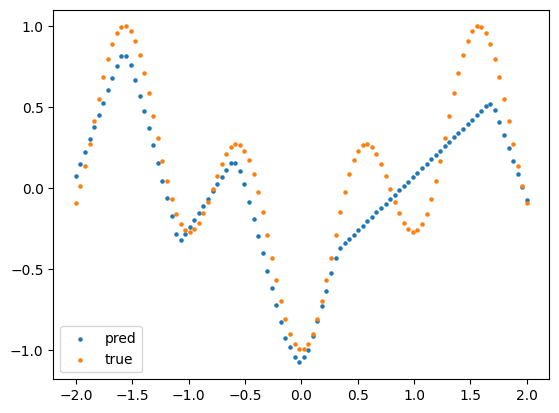

In [20]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds[:,0], label='pred', s=5)
ax.scatter(Xtest, Ytest[:,0], label='true', s=5)
ax.legend()
plt.show()

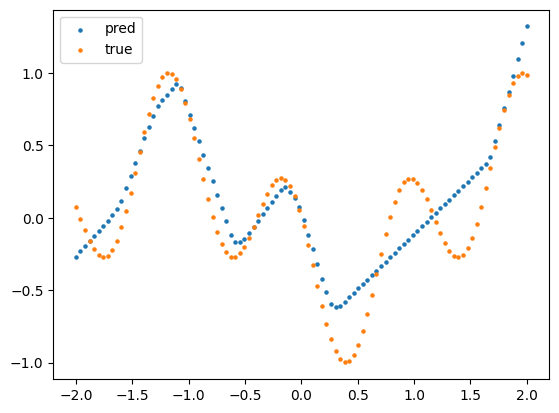

In [21]:
fig, ax = plt.subplots()

ax.scatter(Xtest, preds[:,1], label='pred', s=5)
ax.scatter(Xtest, Ytest[:,1], label='true', s=5)
ax.legend()
plt.show()

In [22]:
if (regression_mse_f1 < regression_mse_f2):
    print(f'Seed: {seed} learns f1 better. f1 MSE: {regression_mse_f1:.4f}, f2 MSE: {regression_mse_f2:.4f}')
else:
    print(f'Seed: {seed} learns f2 better. f1 MSE: {regression_mse_f1:.4f}, f2 MSE: {regression_mse_f2:.4f}')

Seed: 0 learns f2 better. f1 MSE: 0.0584, f2 MSE: 0.0506
